# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("ALUGUEL_MOD12.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [4]:
# Verificando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7203 entries, 0 to 7202
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Valor_Aluguel     7203 non-null   int64
 1   Valor_Condominio  7203 non-null   int64
 2   Metragem          7203 non-null   int64
 3   N_Quartos         7203 non-null   int64
 4   N_banheiros       7203 non-null   int64
 5   N_Suites          7203 non-null   int64
 6   N_Vagas           7203 non-null   int64
dtypes: int64(7)
memory usage: 394.0 KB


In [5]:
# Verificando a presença de valores ausentes
df.isna().sum()

Valor_Aluguel       0
Valor_Condominio    0
Metragem            0
N_Quartos           0
N_banheiros         0
N_Suites            0
N_Vagas             0
dtype: int64

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [6]:
# Utilizando o método describe para obter estatísticas descritivas
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


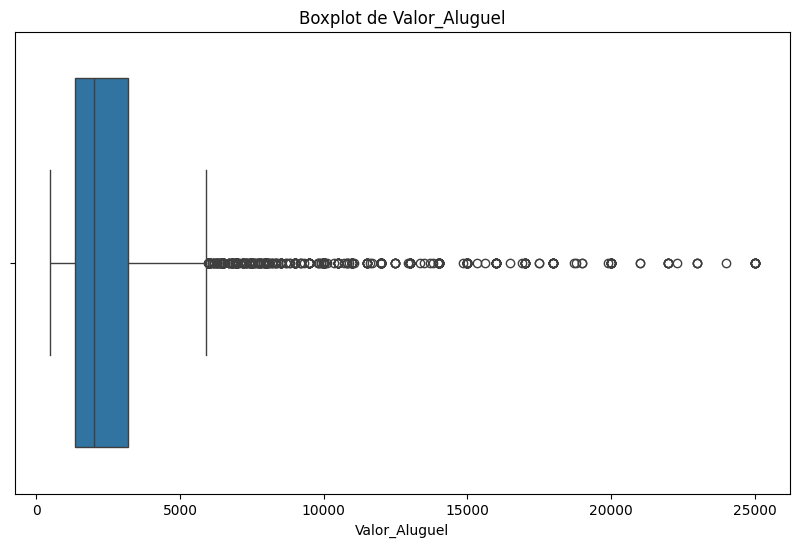

In [7]:
# Verificando os a presença de outliers em Valor_Aluguel
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Valor_Aluguel'])
plt.title('Boxplot de Valor_Aluguel')
plt.show()

In [8]:
# Contando o número de outliers em Valor_Aluguel
Q1 = df['Valor_Aluguel'].quantile(0.25)
Q3 = df['Valor_Aluguel'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['Valor_Aluguel'] < limite_inferior) | (df['Valor_Aluguel'] > limite_superior)]
print(f"Número de outliers: {outliers.shape[0]}")

# Tratando outliers em Valor_Aluguel substituindo pela mediana
mediana_valor_aluguel = df['Valor_Aluguel'].median()
df.loc[(df['Valor_Aluguel'] < limite_inferior) | (df['Valor_Aluguel'] > limite_superior), 'Valor_Aluguel'] = mediana_valor_aluguel

Número de outliers: 749


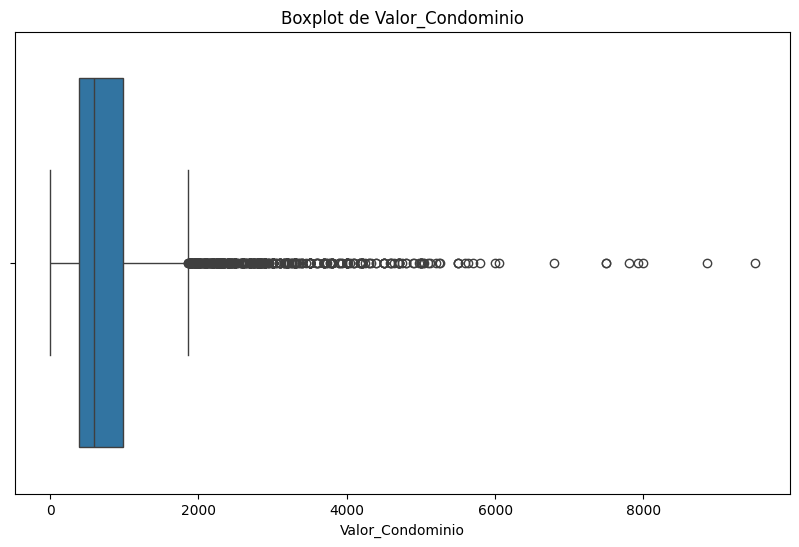

In [9]:
# Verificando outliers em Valor_Condominio
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Valor_Condominio'])
plt.title('Boxplot de Valor_Condominio')
plt.show()

In [10]:
# Contando o número de outliers em Valor_Condominio
Q1 = df['Valor_Condominio'].quantile(0.25)
Q3 = df['Valor_Condominio'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['Valor_Condominio'] < limite_inferior) | (df['Valor_Condominio'] > limite_superior)]
print(f"Número de outliers: {outliers.shape[0]}")

# Tratando os outliers em Valor_Condominio substituindo pela mediana
mediana = df['Valor_Condominio'].median()
df.loc[(df['Valor_Condominio'] < limite_inferior) | (df['Valor_Condominio'] > limite_superior), 'Valor_Condominio'] = mediana


Número de outliers: 586


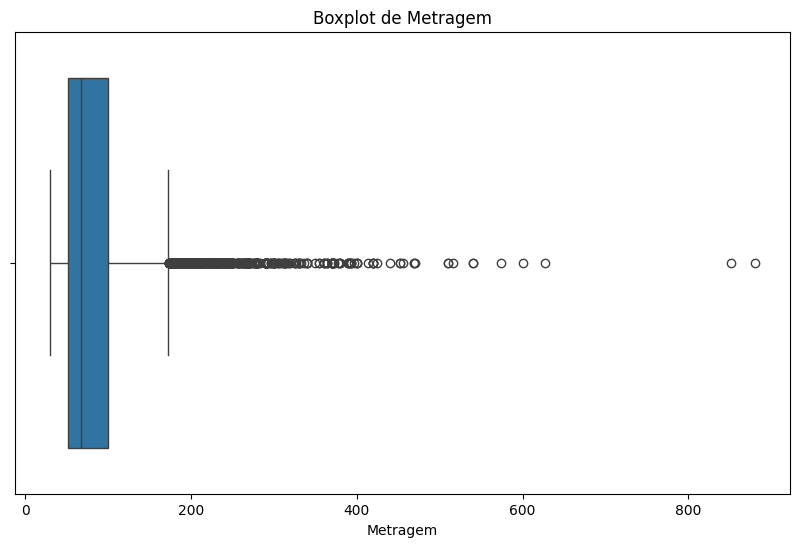

In [11]:
# Verificando outliers em Metragem
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Metragem'])
plt.title('Boxplot de Metragem')
plt.show()

In [12]:
# Contando o número de outliers em Metragem
Q1 = df['Metragem'].quantile(0.25)
Q3 = df['Metragem'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['Metragem'] < limite_inferior) | (df['Metragem'] > limite_superior)]
print(f"Número de outliers: {outliers.shape[0]}")

# Tratando os outliers em Metragem substituindo pela mediana
mediana = df['Metragem'].median()
df.loc[(df['Metragem'] < limite_inferior) | (df['Metragem'] > limite_superior), 'Metragem'] = mediana

Número de outliers: 647


In [13]:
# Observando o DataFrame após o tratamento
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2134.904901,625.466195,72.752464,2.300153,2.095932,1.016660,1.44176
std,1070.164858,404.318227,30.270753,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,2500.000000,795.500000,80.000000,3.000000,2.000000,1.000000,2.00000
max,5900.000000,1854.000000,172.000000,10.000000,8.000000,5.000000,9.00000


Substituí os outliers de Metragem, Valor_Aluguel e Valor_Condominio pela mediana para evitar que valores muito extremos distorçam os resultados da regressão linear. A mediana mantém a tendência central dos dados sem ser influenciada por esses extremos, ajudando o modelo a ter previsões mais estáveis.

### Analise Bivariada

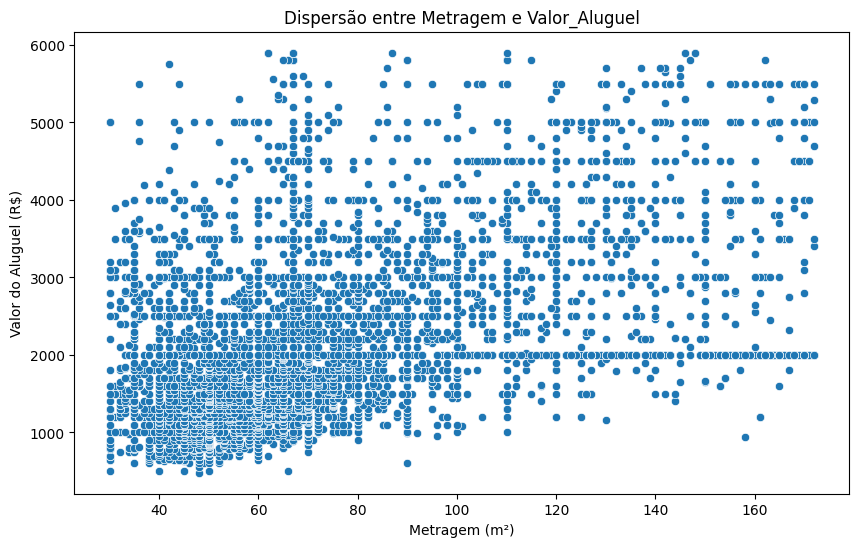

In [14]:
# Observando a influência da metragem no valor do aluguel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Metragem', y='Valor_Aluguel', data=df)
plt.title('Dispersão entre Metragem e Valor_Aluguel')
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Aluguel (R$)')
plt.show()

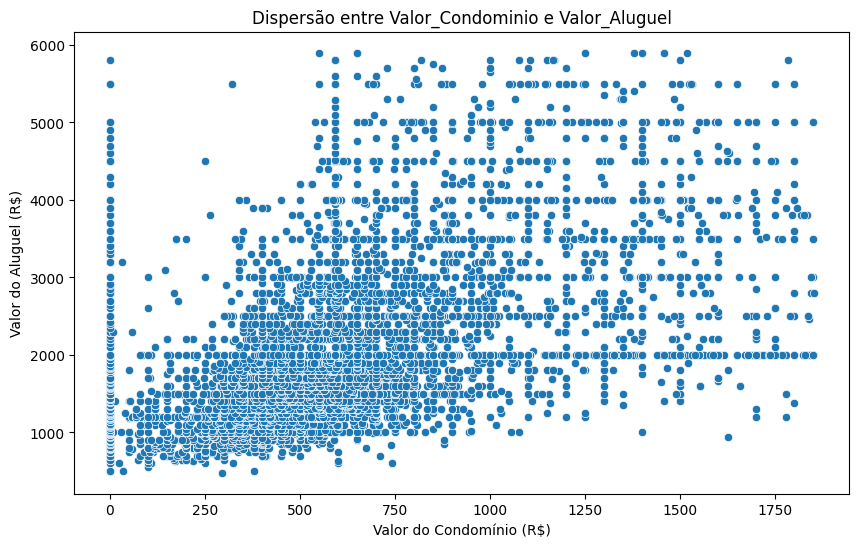

In [15]:
# Observando a influência do Valor_Condominio no valor do aluguel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor_Condominio', y='Valor_Aluguel', data=df)
plt.title('Dispersão entre Valor_Condominio e Valor_Aluguel')
plt.xlabel('Valor do Condomínio (R$)')
plt.ylabel('Valor do Aluguel (R$)')
plt.show()


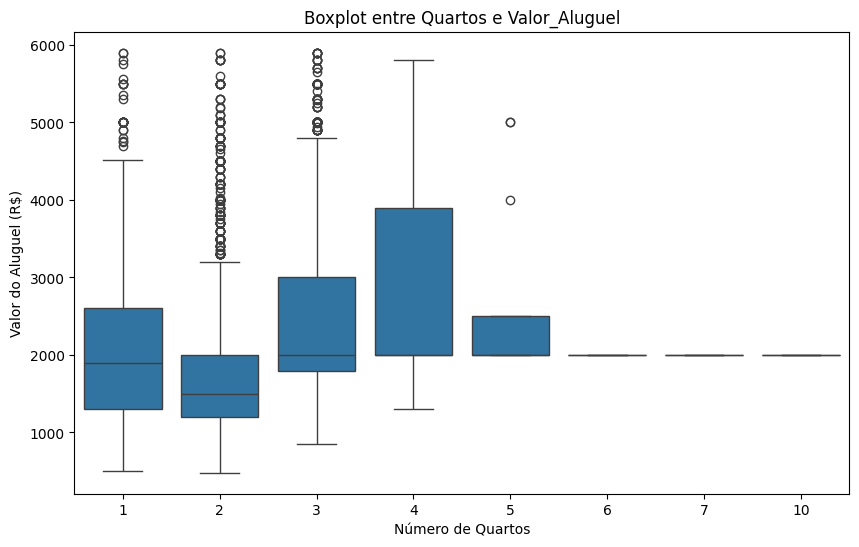

In [16]:
# Observando a influência do numero de quartos no valor do aluguel
plt.figure(figsize=(10, 6))
sns.boxplot(x='N_Quartos', y='Valor_Aluguel', data=df)
plt.title('Boxplot entre Quartos e Valor_Aluguel')
plt.xlabel('Número de Quartos')
plt.ylabel('Valor do Aluguel (R$)')
plt.show()


A análise bivariada revelou algumas tendências importantes. Observou-se que, de forma geral, imóveis com maior metragem tendem a apresentar valores de aluguel mais altos, embora exista grande variação para um mesmo tamanho, possivelmente em função de fatores como localização, padrão construtivo e quantidade de vagas ou suítes. A relação entre o valor do condomínio e o aluguel também se mostrou positivamente correlacionada: taxas condominiais mais elevadas costumam estar associadas a imóveis de aluguel mais caro, embora haja exceções, como imóveis com condomínio baixo e aluguel alto, possivelmente situados em regiões valorizadas. Já ao analisar o número de quartos, verificou-se uma tendência de aumento no valor do aluguel conforme cresce a quantidade de dormitórios, mas com ampla variação e presença significativa de outliers, especialmente em imóveis de 1 a 3 quartos. Essa dispersão indica que, além das variáveis analisadas, outros fatores influenciam fortemente o valor do aluguel.

# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




In [17]:
# Correlação entre as variáveis
df.corr()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
Valor_Aluguel,1.000000,0.447943,0.462721,0.258764,0.329639,0.302252,0.358120
Valor_Condominio,0.447943,1.000000,0.558984,0.342216,0.340790,0.297853,0.387631
Metragem,0.462721,0.558984,1.000000,0.534538,0.401854,0.346479,0.395087
N_Quartos,0.258764,0.342216,0.534538,1.000000,0.553807,0.540887,0.591224
N_banheiros,0.329639,0.340790,0.401854,0.553807,1.000000,0.920149,0.694983
N_Suites,0.302252,0.297853,0.346479,0.540887,0.920149,1.000000,0.712054
N_Vagas,0.358120,0.387631,0.395087,0.591224,0.694983,0.712054,1.000000


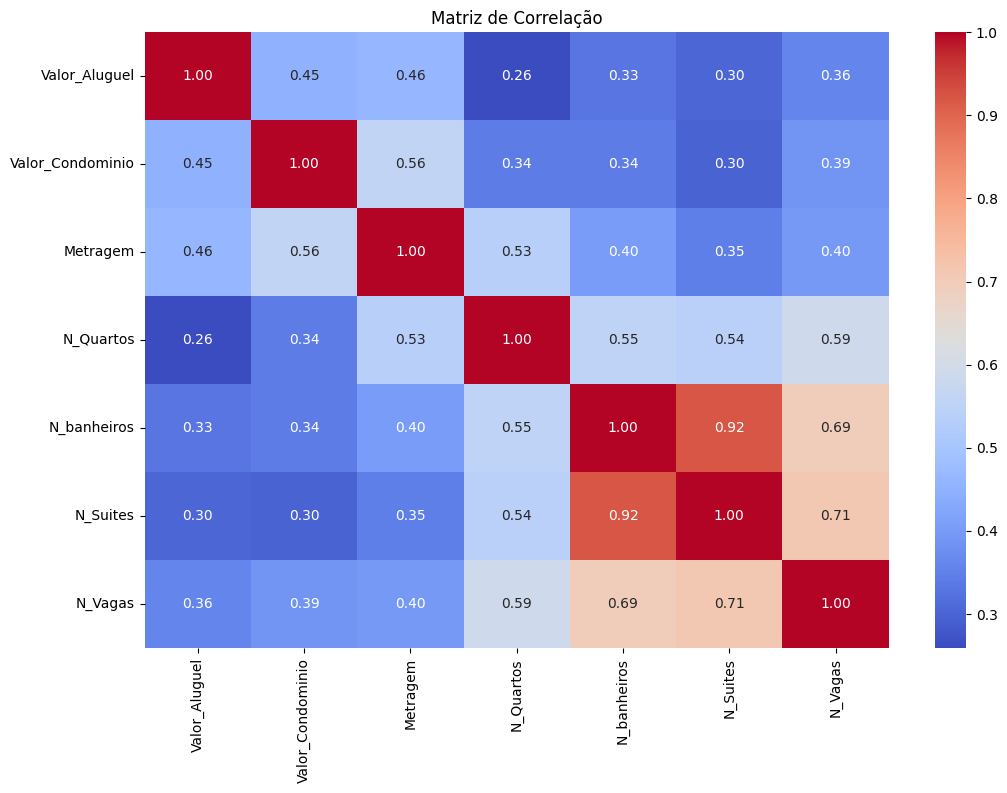

In [18]:
# Gráfico de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

Valor do Aluguel tem relação moderada com Valor do Condomínio (0,45), Metragem (0,46) e Nº de Vagas (0,36). Ou seja, imóveis maiores, com mais vagas e condomínio mais caro tendem a ter aluguel mais alto.

Valor do Condomínio se relaciona bem com Metragem (0,56), mostrando que imóveis maiores geralmente têm condomínio mais caro.

Nº de Banheiros e Nº de Suítes têm relação muito forte (0,92) e também se relacionam com Nº de Vagas (~0,70), indicando que imóveis mais completos costumam reunir esses atributos.

Nº de Quartos e Metragem têm correlação de 0,53 — imóveis com mais quartos costumam ser maiores, mas não é uma regra absoluta.


B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [19]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [21]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [31]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [32]:
X

,Metragem
5985,155
6697,170
2208,32
1423,65
122,56
...,...
3772,48
5191,34
5226,95
5390,74


In [33]:
#Crie seu modelo aqui, usando LinearRegression e as bases de treino.
modelo = LinearRegression()

modelo.fit(X,y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [34]:
print(f'Intercept: {modelo.intercept_}, Coeficiente: {modelo.coef_}')

Intercept: 954.8515412692173, Coeficiente: [16.30564119]


Nossa equação seria: Valor Aluguel = 954 * (Metragem) + 16.3 

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [35]:
# Calculando o R²
r2 = modelo.score(X, y)
print(f'R²: {r2}')

R²: 0.20936757849457277


D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

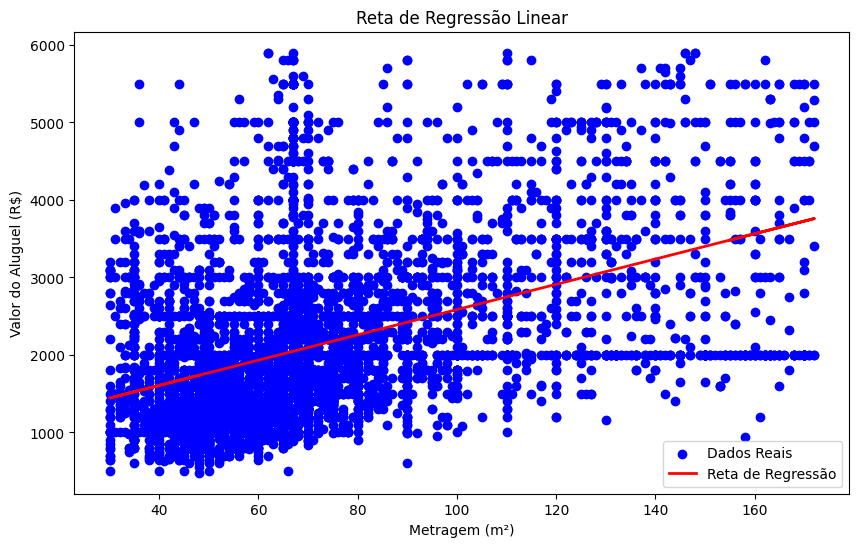

In [36]:
# Plotando a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X, modelo.predict(X), color='red', linewidth=2, label='Reta de Regressão')
plt.title('Reta de Regressão Linear')
plt.xlabel('Metragem (m²)')
plt.ylabel('Valor do Aluguel (R$)')
plt.legend()
plt.show()

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [40]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [41]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = modelo.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = modelo.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.23300934055064215


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

O R² está próximo, o que indica que o modelo tem perfomance consistente entre os conjuntos de treinamento e teste, mas é aparente que o score dele está muito baixo e algumas medidas possíveis o ajudariam a se adequar mais a base de dados, como por exemplo: Utilizar Smote para aumentar o número de dados, melhorar o tratamento dos dados e possivelmente usar scalers para adequar os dados em escalas de 0 a 1

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [42]:
# Separando os dados em treino e teste
X = df.drop('Valor_Aluguel', axis=1)  # Variável independente (características)
y = df['Valor_Aluguel']  # Variável dependente (rótulo)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [43]:
# Criando o modelo de regressão linear múltipla
modelo = LinearRegression()

modelo.fit(X_train, y_train)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [44]:
# Calculando o R²
r2 = modelo.score(X, y)
print(f'R²: {r2}')

R²: 0.29692171296748093


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [45]:
# Calculando o R² nos dados de teste
r2_test = modelo.score(X_test, y_test)
print(f'R² nos dados de teste: {r2_test}')

R² nos dados de teste: 0.2987628096596606


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Os R²s dos dois modelos são próximos, com a regressão múltipla um pouco melhor com ~7% a mais de precisão do que a regressão simples. Acredito que a regressão múltipla se saiu melhor pois leva mais variáveis em consideração, assim possivelmente alcançando um score melhor por ter um contexto maior, mas vale ressaltar que este mesmo contexto pode levar a resultados errônios caso os dados não estejam bem tratados para o treinamento, o baixo R² mostra que os dados não foram aperfeiçoados o suficiente para que o modelo pudesse se sobressair